# Stroke Trial Predictions

 In This Notebook I implemented an artifical neural network; to predict deaths in the International Stroke Trial.The training set includes information about 9,762 patients within the trial. The test set includes related information about 9,558 additional patients. The goal of this competition is to predict whether each patient was still living or not six months after the initial event.

In [1]:
# DATA PREPROCESSING

## IMPORT LIBRARIES

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
# the encoding format of our files is different from the default fomrat of read_csv method
# so I got help from chardet library to know the encoding format of our files

import chardet

raw_data = open('./dataset/train.csv', 'rb').read()
result = chardet.detect(raw_data)
char_enc = result['encoding']
print(char_enc)

Windows-1252


In [3]:
## fetch train dataset

train_data = pd.read_csv('./dataset/train.csv',encoding='Windows-1252')

/home/asimz-abdalla/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (32) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


## in the following cells I dropped any unuseful columns like:
- colmuns with more the 50% of missing values
- colmuns with no significant impact or affect (i.e IDs,columns whose values are static etc..)
- colmuns that are not present in the test dataset as we shall see.

In [4]:
## Droping Columns that have more than 50% of their value is NULL

train_data = train_data.drop(['DHH14','DMAJNCHD','DMAJNCHX','DSIDED','DSIDEX','DNOSTRKX','DRSISCD','DRSHD','DRSUNKD','DPED','DALIVED','DPLACE','DDEADD','DDEADC','DDEADX','FLASTD','FDEADD','FDEADC','FDEADX','FRECOVER','NCCODE'],axis=1)

In [5]:

train_data = train_data.drop(['ID','DIVH','DAP','DOAC','DGORM','DSTER','DCAREND','DHAEMD','DTHROMB','DMAJNCH','DDIAGUN','DDIAGHA','DSIDE','DNOSTRK','DRSISC','DRSH','DPE','SET14D','DEAD1','DEAD2','DEAD3','DEAD4','DEAD5','DEAD6','DEAD7','DEAD8','H14','ISC14','NK14','STRK14','HTI14','PE14','DVT14','TRAN14','NCB14'],axis=1)

In [6]:
train_data = train_data.drop(['DDEAD', 'FDEAD','OCCODE'],axis=1)

In [7]:
train_data.head()

,HOSPNUM,RDELAY,RCONSC,SEX,AGE,RSLEEP,RATRIAL,RCT,RVISINF,RHEP24,...,CNTRYNUM,FU1_COMP,CMPLASP,CMPLHEP,DIED,TD,EXPDD,EXPD6,EXPD14,ID14
0,1,17,D,M,69,Y,NaN,Y,Y,NaN,...,27,NaN,Y,Y,0,187.0,0.6980,0.2344,0.1054,0
1,1,10,F,M,76,Y,NaN,Y,N,NaN,...,27,NaN,Y,Y,0,192.0,0.5389,0.1555,0.0421,0
2,1,24,F,M,23,N,NaN,Y,N,NaN,...,27,NaN,Y,Y,0,193.0,0.1500,0.0038,0.0054,0
3,1,5,D,F,83,N,NaN,N,N,NaN,...,27,NaN,Y,N,0,242.0,0.9489,0.5412,0.2304,0
4,1,8,D,F,64,Y,NaN,Y,Y,NaN,...,27,NaN,Y,Y,0,198.0,0.8480,0.2780,0.1559,0


## Data Imputing 

  Impute missing values:
  
        Columns of dtype object are imputed with the most frequent value
        in column (mode of the column).

        Columns of other types are imputed with mean of column.


In [8]:
## Handling the rest of the colmuns that have missing values

import data_frame_imputer as df_imputer



imputed_train_data = df_imputer.DataFrameImputer().fit_transform(train_data)

imputed_train_data.head()

,HOSPNUM,RDELAY,RCONSC,SEX,AGE,RSLEEP,RATRIAL,RCT,RVISINF,RHEP24,...,CNTRYNUM,FU1_COMP,CMPLASP,CMPLHEP,DIED,TD,EXPDD,EXPD6,EXPD14,ID14
0,1,17,D,M,69,Y,N,Y,Y,N,...,27,31.854937,Y,Y,0,187.0,0.6980,0.2344,0.1054,0
1,1,10,F,M,76,Y,N,Y,N,N,...,27,31.854937,Y,Y,0,192.0,0.5389,0.1555,0.0421,0
2,1,24,F,M,23,N,N,Y,N,N,...,27,31.854937,Y,Y,0,193.0,0.1500,0.0038,0.0054,0
3,1,5,D,F,83,N,N,N,N,N,...,27,31.854937,Y,N,0,242.0,0.9489,0.5412,0.2304,0
4,1,8,D,F,64,Y,N,Y,Y,N,...,27,31.854937,Y,Y,0,198.0,0.8480,0.2780,0.1559,0


## Label encoding of data
- I only encoded the non-numerical columns the list of these colmuns can be found in multi_colmun_label_encoder.py file

In [9]:
## Encode the data using label encoding

import multi_column_label_encoder as encoder


encoded_train_data = encoder.MultiColumnLabelEncoder(columns=encoder.categorical_columns).fit_transform(imputed_train_data)
encoded_train_data.head()

['RCONSC', 'SEX', 'RSLEEP', 'RATRIAL', 'RCT', 'RVISINF', 'RHEP24', 'RASP3', 'RDEF1', 'RDEF2', 'RDEF3', 'RDEF4', 'RDEF5', 'RDEF6', 'RDEF7', 'RDEF8', 'STYPE', 'RDATE', 'RXASP', 'RXHEP', 'DASP14', 'DASPLT', 'DLH14', 'DMH14', 'DSCH', 'DCAA', 'DDIAGISC', 'DRSUNK', 'DALIVE', 'FDENNIS', 'FPLACE', 'FAP', 'FOAC', 'COUNTRY', 'CMPLASP', 'CMPLHEP']


,HOSPNUM,RDELAY,RCONSC,SEX,AGE,RSLEEP,RATRIAL,RCT,RVISINF,RHEP24,...,CNTRYNUM,FU1_COMP,CMPLASP,CMPLHEP,DIED,TD,EXPDD,EXPD6,EXPD14,ID14
0,1,17,0,1,69,1,0,1,1,0,...,27,31.854937,1,1,0,187.0,0.6980,0.2344,0.1054,0
1,1,10,1,1,76,1,0,1,0,0,...,27,31.854937,1,1,0,192.0,0.5389,0.1555,0.0421,0
2,1,24,1,1,23,0,0,1,0,0,...,27,31.854937,1,1,0,193.0,0.1500,0.0038,0.0054,0
3,1,5,0,0,83,0,0,0,0,0,...,27,31.854937,1,0,0,242.0,0.9489,0.5412,0.2304,0
4,1,8,0,0,64,1,0,1,1,0,...,27,31.854937,1,1,0,198.0,0.8480,0.2780,0.1559,0


<AxesSubplot:xlabel='DIED', ylabel='count'>

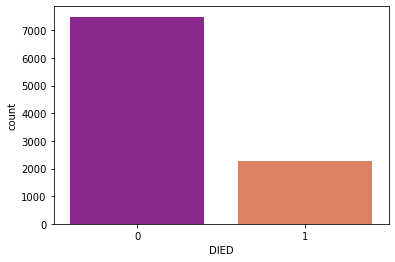

In [10]:
## filter out target column and features colmuns

target = encoded_train_data['DIED']
X_train = encoded_train_data.drop(['DIED'],axis=1)


sns.countplot(x='DIED', data=pd.DataFrame(target),palette ='plasma')


In [11]:
## Feature scaling

## scale the values of our dataset

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))

scaled_X_train = scaler.fit_transform(X_train)


In [12]:
scaled_X_train.shape

(9762, 53)

In [13]:
target

0       0
1       0
2       0
3       0
4       0
       ..
9757    0
9758    0
9759    0
9760    0
9761    0
Name: DIED, Length: 9762, dtype: int64

In [14]:
### Create our Artifical Neural Network

## Some Keras imports

import keras
from keras import backend as K
from keras.models import Sequential
from keras.layers.core import Dense
from keras.optimizers import Adam

## The ANN model characteristics:

- 2 hidden layers with 32 input nodes in each one.
- I used ReLU as my activation function for both hidden layers.
- An output layer with Sigmoid functio.
- I used Adam optimizer for minimize the loss and increasing the accuracy with learning rate of 0.0001.
- I used binary cross entropy for my loss function.
- I also split 15% of the training data for validation and to check for overfitting.


In [15]:
model = Sequential([
    Dense(32, input_dim=53, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 32)                1728      
_________________________________________________________________
dense_1 (Dense)              (None, 32)                1056      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 33        
Total params: 2,817
Trainable params: 2,817
Non-trainable params: 0
_________________________________________________________________


In [17]:
model.compile(loss='binary_crossentropy', optimizer=Adam(lr=0.0001), metrics=['accuracy'])

In [18]:
 model.fit(scaled_X_train, target,validation_split=0.15, epochs=50,shuffle=True, batch_size=20,verbose=2)

Epoch 1/50
415/415 - 3s - loss: 0.6388 - accuracy: 0.6170 - val_loss: 0.5146 - val_accuracy: 0.7522
Epoch 2/50
415/415 - 2s - loss: 0.4356 - accuracy: 0.8050 - val_loss: 0.4020 - val_accuracy: 0.8348
Epoch 3/50
415/415 - 2s - loss: 0.3384 - accuracy: 0.8718 - val_loss: 0.3284 - val_accuracy: 0.8655
Epoch 4/50
415/415 - 3s - loss: 0.2840 - accuracy: 0.8903 - val_loss: 0.2888 - val_accuracy: 0.8710
Epoch 5/50
415/415 - 3s - loss: 0.2498 - accuracy: 0.9019 - val_loss: 0.2611 - val_accuracy: 0.8792
Epoch 6/50
415/415 - 3s - loss: 0.2262 - accuracy: 0.9076 - val_loss: 0.2399 - val_accuracy: 0.8949
Epoch 7/50
415/415 - 3s - loss: 0.2084 - accuracy: 0.9150 - val_loss: 0.2233 - val_accuracy: 0.9031
Epoch 8/50
415/415 - 2s - loss: 0.1948 - accuracy: 0.9184 - val_loss: 0.2115 - val_accuracy: 0.9065
Epoch 9/50
415/415 - 2s - loss: 0.1829 - accuracy: 0.9227 - val_loss: 0.2023 - val_accuracy: 0.9099
Epoch 10/50
415/415 - 2s - loss: 0.1732 - accuracy: 0.9278 - val_loss: 0.1934 - val_accuracy: 0.9119

In [19]:
## Read the test data 

test_data = pd.read_csv('./dataset/Test1.csv',encoding='Windows-1252')

/home/asimz-abdalla/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (32) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [20]:
test_data.head()

,ID,HOSPNUM,RDELAY,RCONSC,SEX,AGE,RSLEEP,RATRIAL,RCT,RVISINF,...,DEAD8,H14,ISC14,NK14,STRK14,HTI14,PE14,DVT14,TRAN14,NCB14
0,9826,1,43,F,F,71,N,NaN,Y,N,...,0,0,0,0,0,0,0,0,0,0
1,9827,1,6,F,M,81,N,NaN,N,N,...,0,0,0,0,0,0,0,0,0,0
2,9828,4,20,F,M,78,N,NaN,N,N,...,0,0,0,0,0,0,0,0,0,0
3,9829,1,39,F,M,54,N,NaN,Y,N,...,0,0,0,0,0,0,0,0,0,0
4,9830,1,4,F,F,77,N,NaN,N,N,...,0,0,0,0,0,0,0,0,0,1


In [21]:
IDs = test_data['ID']
IDs

0        9826
1        9827
2        9828
3        9829
4        9830
        ...  
9553    19379
9554    19380
9555    19381
9556    19382
9557    19383
Name: ID, Length: 9558, dtype: int64

In [22]:
trained_cols = ['HOSPNUM', 'RDELAY', 'RCONSC', 'SEX', 'AGE', 'RSLEEP', 'RATRIAL', 'RCT',
       'RVISINF', 'RHEP24', 'RASP3', 'RSBP', 'RDEF1', 'RDEF2', 'RDEF3',
       'RDEF4', 'RDEF5', 'RDEF6', 'RDEF7', 'RDEF8', 'STYPE', 'RDATE',
       'HOURLOCAL', 'MINLOCAL', 'DAYLOCAL', 'RXASP', 'RXHEP', 'DASP14',
       'DASPLT', 'DLH14', 'DMH14', 'ONDRUG', 'DSCH', 'DCAA', 'DDIAGISC',
       'DRSUNK', 'DALIVE', 'FDENNIS', 'FPLACE', 'FAP',
       'FOAC', 'FU1_RECD', 'FU2_DONE', 'COUNTRY', 'CNTRYNUM', 'FU1_COMP',
       'CMPLASP', 'CMPLHEP', 'TD', 'EXPDD', 'EXPD6', 'EXPD14', 'ID14',
       ]

test_data= test_data[trained_cols]

In [23]:
test_data.head()

,HOSPNUM,RDELAY,RCONSC,SEX,AGE,RSLEEP,RATRIAL,RCT,RVISINF,RHEP24,...,COUNTRY,CNTRYNUM,FU1_COMP,CMPLASP,CMPLHEP,TD,EXPDD,EXPD6,EXPD14,ID14
0,1,43,F,F,71,N,NaN,Y,N,NaN,...,UK,27,NaN,Y,Y,189.0,0.5275,0.1009,0.0323,0
1,1,6,F,M,81,N,NaN,N,N,NaN,...,UK,27,NaN,Y,Y,183.0,0.4021,0.1147,0.0244,0
2,4,20,F,M,78,N,NaN,N,N,NaN,...,UK,27,NaN,Y,Y,214.0,0.5600,0.1709,0.0441,0
3,1,39,F,M,54,N,NaN,Y,N,NaN,...,UK,27,NaN,Y,Y,185.0,0.3132,0.0471,0.0244,0
4,1,4,F,F,77,N,NaN,N,N,NaN,...,UK,27,15.0,Y,Y,194.0,0.7285,0.1873,0.0530,0


In [24]:
## Handling the rest of the colmuns that have missing values

import data_frame_imputer as df_imputer



imputed_test_data = df_imputer.DataFrameImputer().fit_transform(test_data)

imputed_test_data.head()

,HOSPNUM,RDELAY,RCONSC,SEX,AGE,RSLEEP,RATRIAL,RCT,RVISINF,RHEP24,...,COUNTRY,CNTRYNUM,FU1_COMP,CMPLASP,CMPLHEP,TD,EXPDD,EXPD6,EXPD14,ID14
0,1,43,F,F,71,N,N,Y,N,N,...,UK,27,30.792542,Y,Y,189.0,0.5275,0.1009,0.0323,0
1,1,6,F,M,81,N,N,N,N,N,...,UK,27,30.792542,Y,Y,183.0,0.4021,0.1147,0.0244,0
2,4,20,F,M,78,N,N,N,N,N,...,UK,27,30.792542,Y,Y,214.0,0.5600,0.1709,0.0441,0
3,1,39,F,M,54,N,N,Y,N,N,...,UK,27,30.792542,Y,Y,185.0,0.3132,0.0471,0.0244,0
4,1,4,F,F,77,N,N,N,N,N,...,UK,27,15.000000,Y,Y,194.0,0.7285,0.1873,0.0530,0


In [25]:
## Encode the data using one-hot encoding

import multi_column_label_encoder as encoder


encoded_test_data = encoder.MultiColumnLabelEncoder(columns=encoder.categorical_columns).fit_transform(imputed_test_data)
encoded_test_data.head()

['RCONSC', 'SEX', 'RSLEEP', 'RATRIAL', 'RCT', 'RVISINF', 'RHEP24', 'RASP3', 'RDEF1', 'RDEF2', 'RDEF3', 'RDEF4', 'RDEF5', 'RDEF6', 'RDEF7', 'RDEF8', 'STYPE', 'RDATE', 'RXASP', 'RXHEP', 'DASP14', 'DASPLT', 'DLH14', 'DMH14', 'DSCH', 'DCAA', 'DDIAGISC', 'DRSUNK', 'DALIVE', 'FDENNIS', 'FPLACE', 'FAP', 'FOAC', 'COUNTRY', 'CMPLASP', 'CMPLHEP']


,HOSPNUM,RDELAY,RCONSC,SEX,AGE,RSLEEP,RATRIAL,RCT,RVISINF,RHEP24,...,COUNTRY,CNTRYNUM,FU1_COMP,CMPLASP,CMPLHEP,TD,EXPDD,EXPD6,EXPD14,ID14
0,1,43,1,0,71,0,0,1,0,0,...,34,27,30.792542,1,1,189.0,0.5275,0.1009,0.0323,0
1,1,6,1,1,81,0,0,0,0,0,...,34,27,30.792542,1,1,183.0,0.4021,0.1147,0.0244,0
2,4,20,1,1,78,0,0,0,0,0,...,34,27,30.792542,1,1,214.0,0.5600,0.1709,0.0441,0
3,1,39,1,1,54,0,0,1,0,0,...,34,27,30.792542,1,1,185.0,0.3132,0.0471,0.0244,0
4,1,4,1,0,77,0,0,0,0,0,...,34,27,15.000000,1,1,194.0,0.7285,0.1873,0.0530,0


In [26]:
## Feature scaling

## scale the values of our dataset

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))

scaled_X_test = scaler.fit_transform(encoded_test_data)

In [27]:
scaled_X_test

array([[0.        , 0.89361702, 0.5       , ..., 0.10945778, 0.04959128,
        0.        ],
       [0.        , 0.10638298, 0.5       , ..., 0.12501409, 0.03524069,
        0.        ],
       [0.00529101, 0.40425532, 0.5       , ..., 0.18836659, 0.07102634,
        0.        ],
       ...,
       [0.59964727, 0.42553191, 0.5       , ..., 0.16514485, 0.06394187,
        0.        ],
       [0.44797178, 0.82978723, 0.        , ..., 0.65077218, 0.42161671,
        1.        ],
       [0.44797178, 0.29787234, 0.5       , ..., 0.05963251, 0.04777475,
        0.        ]])

In [28]:
predictions = model.predict(scaled_X_test,batch_size=20,verbose=0)

In [32]:
death_prediction = model.predict_classes(scaled_X_test,batch_size=20,verbose=0)

In [33]:
death_prediction

array([[0],
       [0],
       [0],
       ...,
       [0],
       [1],
       [0]], dtype=int32)

In [30]:
death_predictions = pd.DataFrame(death_prediction)
death_predictions['ID'] = IDs
death_predictions= death_predictions.rename(columns={0:'PatientDied'})

death_predictions = death_predictions[['ID','PatientDied']]
death_predictions

,ID,PatientDied
0,9826,0
1,9827,0
2,9828,0
3,9829,0
4,9830,0
...,...,...
9553,19379,0
9554,19380,0
9555,19381,0
9556,19382,1


In [38]:
death_predictions = death_predictions.replace(to_replace=[0, 1], value=['N', 'Y'])

In [39]:
death_predictions.to_csv('death_predictions.csv',index=False)